<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Diversi%C3%B3n/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
celsius=np.array([-40,-10,0,8,15,22,38], dtype=float)
fahrenheit=np.array([-40,14,32,46,59,72,100], dtype=float)

In [ ]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
from tensorflow.python import framework
print('Comenzando entrenamiento...')
historial = modelo.fit(celsius,fahrenheit,epochs=1000,verbose=False)
print('Modelo entrenado!')

Comenzando entrenamiento...
Modelo entrenado!


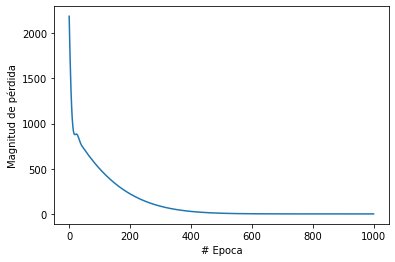

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history["loss"])

In [ ]:
resultado = modelo.predict([100.0])
print('El resultado es ',resultado,' fahrenheit')

El resultado es  [[211.7436]]  fahrenheit


In [ ]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.7981665]], dtype=float32), array([31.926962], dtype=float32)]


###Prueba 2 con más capas###
2 capas intermedias con 3 neuronas

In [ ]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1,oculta2,salida])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [ ]:
from tensorflow.python import framework
print('Comenzando entrenamiento...')
historial = modelo.fit(celsius,fahrenheit,epochs=1000,verbose=False)
print('Modelo entrenado!')

Comenzando entrenamiento...
Modelo entrenado!


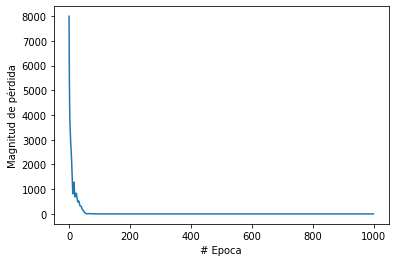

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(historial.history["loss"])

In [ ]:
resultado = modelo.predict([100.0])
print('El resultado es ',resultado,' fahrenheit')

El resultado es  [[211.74744]]  fahrenheit


In [ ]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[ 1.0373366,  0.5399495, -0.1329702]], dtype=float32), array([5.4933796, 2.9962437, 4.027694 ], dtype=float32)]
[array([[-0.1513649 ,  1.4290107 , -0.53482914],
       [ 0.50242484, -0.14443447, -0.75155765],
       [-0.4888207 ,  0.91184115, -1.2025043 ]], dtype=float32), array([ 0.22366497,  4.2125154 , -5.026839  ], dtype=float32)]
[array([[-0.01912621],
       [ 0.7529448 ],
       [-1.0431468 ]], dtype=float32), array([4.7002997], dtype=float32)]


###Clasificación de imágenes###

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
datos, metadatos =tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5XN8S0/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5XN8S0/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='~/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author  

In [ ]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [ ]:
nombres_clases=metadatos.features['label'].names

In [ ]:
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Normalizar los datos (Pasar de 0-255 a 0-1)

def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aquí lo pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento y pruebas con la función que hicimos
datos_entrenamiento=datos_entrenamiento.map(normalizar)
datos_pruebas=datos_pruebas.map(normalizar)

#Agregar a caché (usar memoria en lugar de disco, entrenamiento más rápido)
datos_entrenamiento=datos_entrenamiento.cache()
datos_pruebas=datos_pruebas.cache()

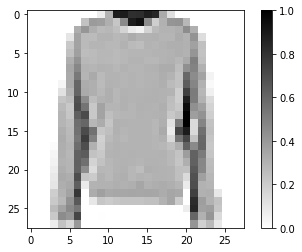

In [ ]:
#Mostrar una imagen de los datos de prueba, de momento mostraremos la primera
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) #Redimensionar, cosas de tensores

import matplotlib.pyplot as plt

#Dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

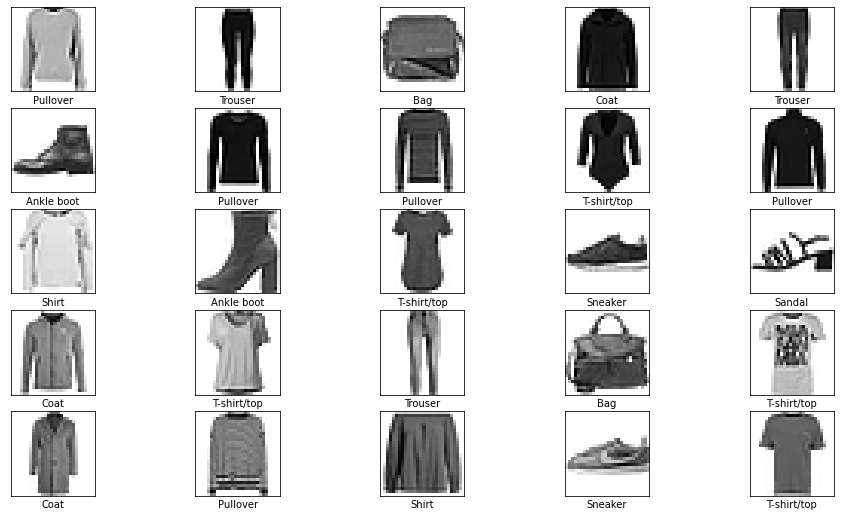

In [ ]:
#Mostrar una imagen de los datos de prueba, de momento mostraremos las 25 primeras
plt.rcParams['figure.figsize'] = (16, 9)
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28)) #Redimensionar, cosas de tensores
  #Dibujar

  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])

plt.show()

In [ ]:
# Crear modelo

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #para redes de clasificación
])

In [ ]:
from tensorflow.python.training.saver import metrics
#Compilar el modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
num_ej_entrenamiento = metadatos.splits['train'].num_examples
num_ej_pruebas = metadatos.splits['test'].num_examples

In [ ]:
TAMANO_LOTE=32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [ ]:
import math

#Entrenar
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/5
1875/1875 [==============================] - 10s 2ms/step - loss: 0.5202 - accuracy: 0.8181
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3869 - accuracy: 0.8605
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3550 - accuracy: 0.8691
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3266 - accuracy: 0.8800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3091 - accuracy: 0.8851


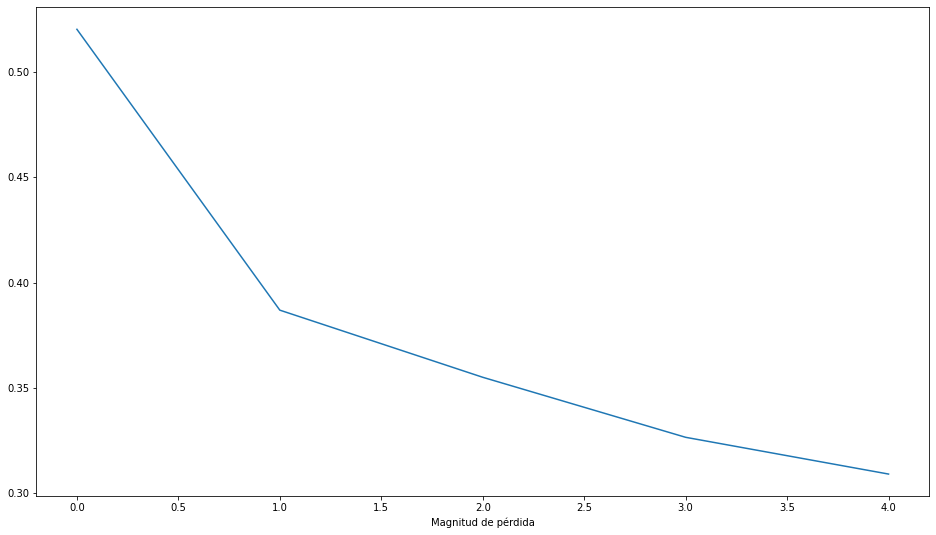

In [ ]:
plt.xlabel('# Epoca')
plt.xlabel('Magnitud de pérdida')
plt.plot(historial.history['loss'])

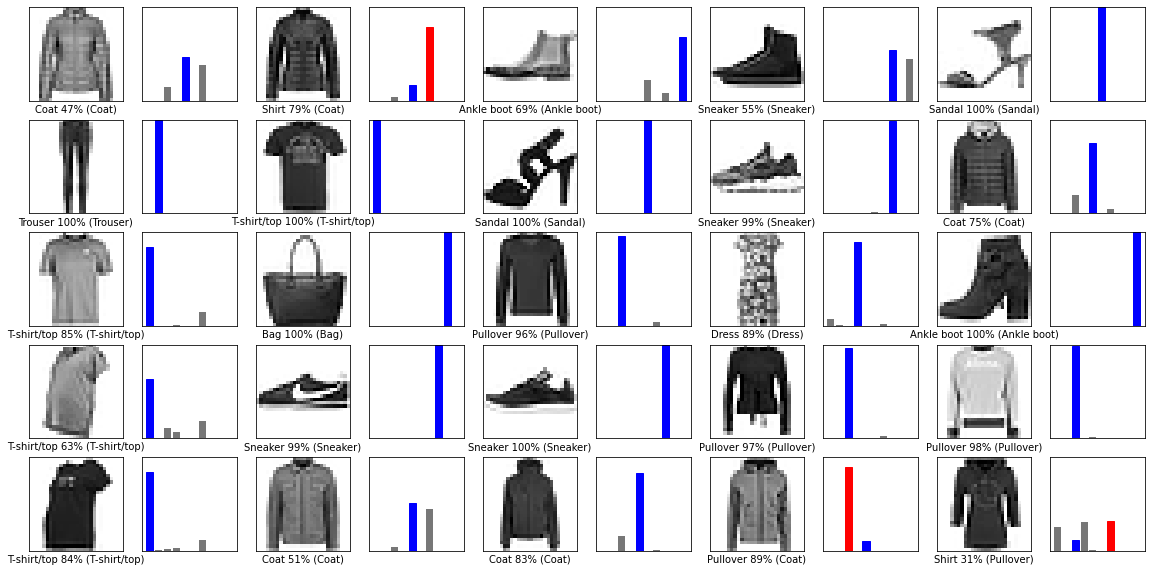

In [ ]:
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba=imagenes_prueba.numpy()
  etiquetas_prueba=etiquetas_prueba.numpy()
  predicciones=modelo.predict(imagenes_prueba)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue' #Si le atino
  else:
    color = 'red' #si no le atino
  
  plt.xlabel("{} {:2.0f}% ({})".format(
      nombres_clases[etiqueta_prediccion],
      100*np.max(arr_predicciones),
      nombres_clases[etiqueta_real],
      color=color
      ))

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0,1])
  etiqueta_prediccion=np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas=5
num_imagenes=filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))

for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [ ]:
#Tomar cualquier indice del set de pruebas para ver su predicción

imagen = imagenes_prueba[0]
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)

print('Predicción: ',nombres_clases[np.argmax(prediccion[0])])

Predicción:  Coat


###Red neuronal con Capas Convolucionales###
Lectura de números escritos a mano https://youtu.be/eGDSlW93Bng

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

#Descargar set de datos de MNIST (Números escritos a mano, etiquetados)
datos, metadatos =tfds.load('mnist', as_supervised=True, with_info=True)

#Obtener en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

#Función de normalización para los datos (Pasar valor de los piceles de 0-255 a 0-1)
#(Hace que la red aprenda mejor y más rápido)

def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aquí se pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento con la función que hicimos

datos_entrenamiento=datos_entrenamiento.map(normalizar)
datos_pruebas=datos_pruebas.map(normalizar)

#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


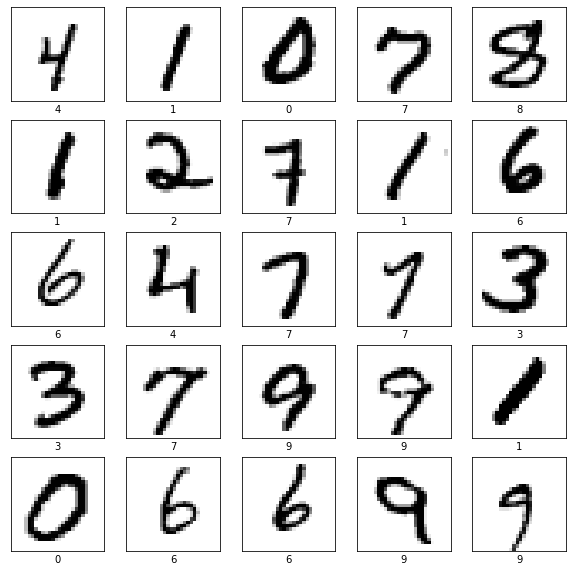

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):

  imagen = imagen.numpy().reshape(28,28)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

Modelo con capas densas y no convolucionales (Esto hizo que si uno pone los números de un tamaño diferente no los detecte, esto sucede porque se concentra en adquirir la información de los píxeles y no de los patrones de forma)

In [3]:
#Crear el modelo (Modelo denso, regular, sin redes convolucionales todavía)

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28,28,1)), #1 = blanco y negro
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [4]:
#Los numeros de datos de entrenamiento y pruebas (60k y 10k)
num_datos_entrenamiento = metadatos.splits["train"].num_examples
num_datos_pruebas = metadatos.splits["test"].num_examples

#Trabajar por lotes
TAMANO_LOTE=32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria
#para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [5]:
#Realizar el entrenamiento
import math

historial = modelo.fit(
    datos_entrenamiento,
    epochs=60,
    steps_per_epoch=math.ceil(num_datos_entrenamiento/TAMANO_LOTE)
)

Epoch 1/60
1875/1875 [==============================] - 20s 4ms/step - loss: 0.2949 - accuracy: 0.9149
Epoch 2/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1374 - accuracy: 0.9584
Epoch 3/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1046 - accuracy: 0.9678
Epoch 4/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0856 - accuracy: 0.9746
Epoch 5/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0690 - accuracy: 0.9792
Epoch 6/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0597 - accuracy: 0.9814
Epoch 7/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9843
Epoch 8/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0438 - accuracy: 0.9861
Epoch 9/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9867
Epoch 10/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.03

Modelo con capas convolucionales

In [3]:
#Crear el modelo (Ya utiliza capas de convolución y agrupación)
#Cuenta con 1 capa de convolución con 32 núcleos y otra con 64. 2 capas de agrupación.
#Finalmente una capa densa con 100 neuronas

modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #2,2 es el tamano de la matriz

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [4]:
#Los numeros de datos de entrenamiento y pruebas (60k y 10k)
num_datos_entrenamiento = metadatos.splits["train"].num_examples
num_datos_pruebas = metadatos.splits["test"].num_examples

#Trabajar por lotes
TAMANO_LOTE=32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria
#para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [5]:
#Realizar el entrenamiento
import math

historial = modelo.fit(
    datos_entrenamiento,
    epochs=60,
    steps_per_epoch=math.ceil(num_datos_entrenamiento/TAMANO_LOTE)
)

Epoch 1/60
1875/1875 [==============================] - 26s 3ms/step - loss: 0.1286 - accuracy: 0.9608
Epoch 2/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0425 - accuracy: 0.9873
Epoch 3/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 4/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0223 - accuracy: 0.9928
Epoch 5/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0163 - accuracy: 0.9951
Epoch 6/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0124 - accuracy: 0.9957
Epoch 7/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0104 - accuracy: 0.9966
Epoch 8/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0098 - accuracy: 0.9969
Epoch 9/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0073 - accuracy: 0.9980
Epoch 10/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00